--- Wczytywanie danych ---
Kształt danych X: (178, 13)
Kształt etykiet y: (178,)

--- Inicjalizacja klasyfikatorów ---
DecisionTreeClassifier zainicjowany.
BaggingClassifier zainicjowany.
AdaBoostClassifier zainicjowany.
GradientBoostingClassifier zainicjowany.

--- Przeprowadzanie 5-krotnej walidacji krzyżowej ---
Testowanie: Pojedyncze Drzewo Decyzyjne...
  Średnia skuteczność: 0.8827 (+/- 0.0770)

Testowanie: Bagging (50 drzew)...
  Średnia skuteczność: 0.9387 (+/- 0.0443)

Testowanie: AdaBoost (50 drzew)...


C:\Users\kamil\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python313\site

  Średnia skuteczność: 0.9333 (+/- 0.0624)

Testowanie: Gradient Boosting (50 drzew)...
  Średnia skuteczność: 0.9606 (+/- 0.0291)

--- Podsumowanie Wyników (Tabela) ---
                Klasyfikator  Średnia Skuteczność  Odchylenie Standardowe
Gradient Boosting (50 drzew)             0.960635                0.029081
          Bagging (50 drzew)             0.938730                0.044326
         AdaBoost (50 drzew)             0.933333                0.062361
 Pojedyncze Drzewo Decyzyjne             0.882698                0.076997


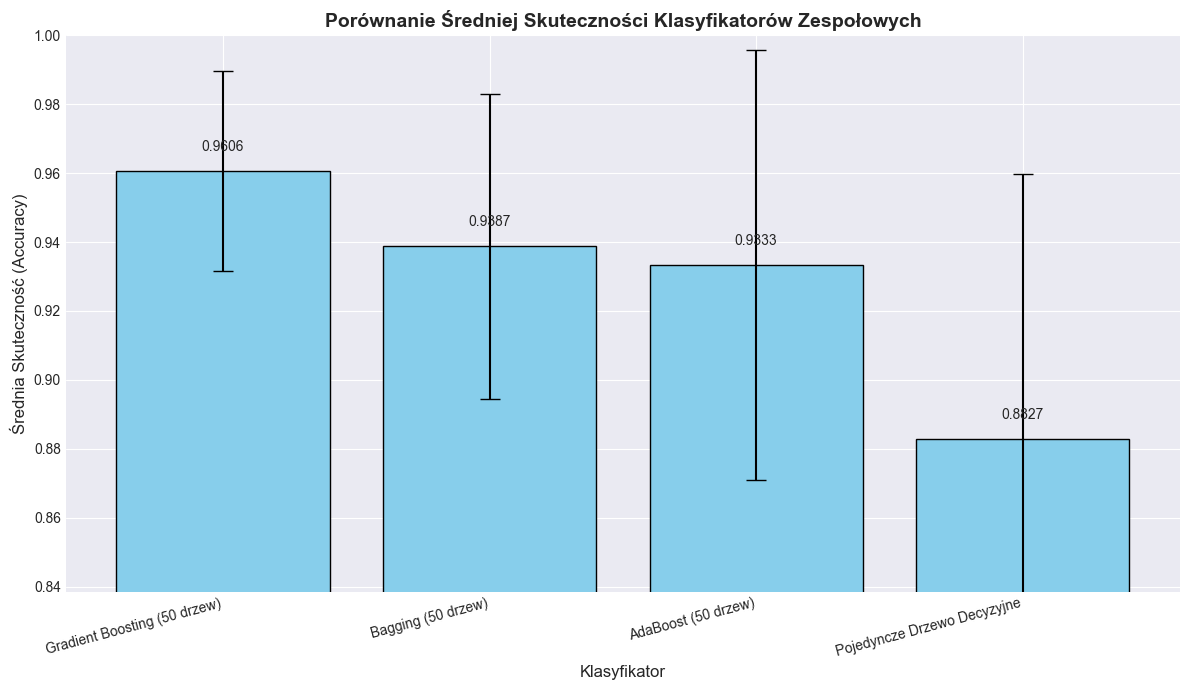

In [3]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

RANDOM_STATE = 42 # ustawienie ziarna dla powtarzalności wyników
N_ESTIMATORS = 50 # liczba drzew w ensemble

# 1. Wczytanie danych
print("--- Wczytywanie danych ---")
wine = load_wine()
X = wine.data
y = wine.target
print(f"Kształt danych X: {X.shape}")
print(f"Kształt etykiet y: {y.shape}\n")

# 2. Inicjalizacja klasyfikatorów
print("--- Inicjalizacja klasyfikatorów ---")

# Pojedyncze drzewo decyzyjne
dt_classifier = DecisionTreeClassifier(min_samples_leaf=3, random_state=RANDOM_STATE)
print("DecisionTreeClassifier zainicjowany.")

# Drzewo decyzyjne z zastosowaniem Baggingu
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(min_samples_leaf=3, random_state=RANDOM_STATE),
    n_estimators=N_ESTIMATORS,
    random_state=RANDOM_STATE,
)
print("BaggingClassifier zainicjowany.")

# Algorytm AdaBoost dla drzewa decyzyjnego
adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=RANDOM_STATE),
    n_estimators=N_ESTIMATORS,
    algorithm='SAMME',
    random_state=RANDOM_STATE
)
print("AdaBoostClassifier zainicjowany.")

# Algorytm Gradient Boosting (dla drzewa decyzyjnego)
gradient_boosting_classifier = GradientBoostingClassifier(
    max_depth=1,
    min_samples_leaf=3, # Dla GB domyślne jest 1, ale zgodnie z zadaniem było 3
    n_estimators=N_ESTIMATORS,
    learning_rate=1.0,
    subsample=0.5,
    random_state=RANDOM_STATE
)
print("GradientBoostingClassifier zainicjowany.\n")

# Słownik z klasyfikatorami do iteracji
classifiers = {
    "Pojedyncze Drzewo Decyzyjne": dt_classifier,
    f"Bagging ({N_ESTIMATORS} drzew)": bagging_classifier,
    f"AdaBoost ({N_ESTIMATORS} drzew)": adaboost_classifier,
    f"Gradient Boosting ({N_ESTIMATORS} drzew)": gradient_boosting_classifier
}

print("--- Przeprowadzanie 5-krotnej walidacji krzyżowej ---")
results = {}
all_scores_data = []

for name, classifier in classifiers.items():
    print(f"Testowanie: {name}...")
    scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    results[name] = {
        'scores': scores,
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores)
    }
    for fold_score in scores:
        all_scores_data.append({'Klasyfikator': name, 'Skuteczność': fold_score})

    print(f"  Średnia skuteczność: {results[name]['mean_accuracy']:.4f} (+/- {results[name]['std_accuracy']:.4f})\n")

df_all_scores = pd.DataFrame(all_scores_data)

print("--- Podsumowanie Wyników (Tabela) ---")
df_results = pd.DataFrame([
    {"Klasyfikator": name, "Średnia Skuteczność": res['mean_accuracy'], "Odchylenie Standardowe": res['std_accuracy']}
    for name, res in results.items()
])
df_results = df_results.sort_values(by="Średnia Skuteczność", ascending=False).reset_index(drop=True)
print(df_results.to_string(index=False))

# --- Wizualizacja Wyników Walidacji Krzyżowej ---
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 7))
bars = plt.bar(df_results["Klasyfikator"], df_results["Średnia Skuteczność"],
               yerr=df_results["Odchylenie Standardowe"], capsize=7, color='skyblue', edgecolor='black')
plt.xlabel("Klasyfikator", fontsize=12)
plt.ylabel("Średnia Skuteczność (Accuracy)", fontsize=12)
plt.title("Porównanie Średniej Skuteczności Klasyfikatorów Zespołowych", fontsize=14, fontweight='bold')
plt.ylim(min(df_results["Średnia Skuteczność"]) * 0.95, 1.0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005,
             f"{yval:.4f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

